In [22]:
# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


## Task 1: Load and Explore the Dataset

In [23]:
try:
    # Load Iris dataset from sklearn
    iris_data = load_iris(as_frame=True)
    df = iris_data.frame  # Convert to pandas DataFrame

    print(" Dataset loaded successfully!\n")


except FileNotFoundError:
    print(" File not found. Please provide the correct CSV path.")
except Exception as e:
    print(f" Error occurred while loading dataset: {e}")

 Dataset loaded successfully!



In [24]:
# Inspect first 5 rows
display(df.head())



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [25]:
# Check structure and missing values
print("Data info:")
display(df.info())
print("Missing values per column:")
display(df.isnull().sum())



Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


None

Missing values per column:


,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
target,0


In [26]:
# Clean missing values (if any)
df = df.dropna()

## Task 2: Basic Data Analysis

In [27]:
# Basic statistics
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [17]:
# Group by species (target) and compute mean
grouped = df.groupby("target").mean()
grouped

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0,5.006,3.428,1.462,0.246
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


**Observation:** Petal length and width vary the most between species, making them strong predictors.

## Task 3: Data Visualization

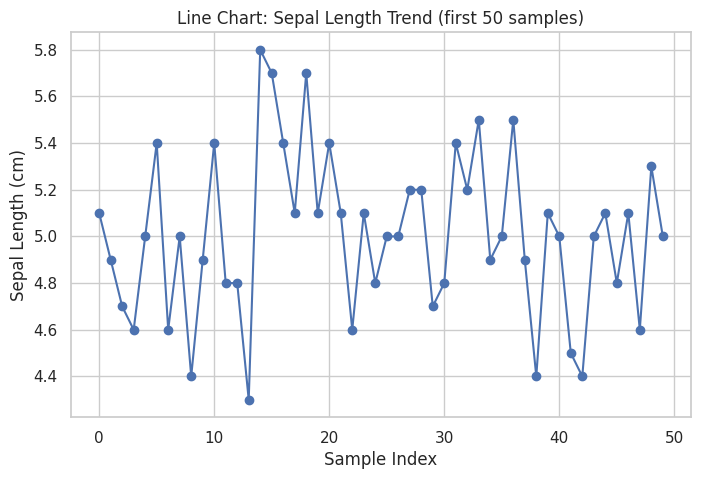

In [18]:
sns.set(style="whitegrid")

# 1. Line chart: Sepal length trend (first 50 samples)
plt.figure(figsize=(8,5))
plt.plot(df.index[:50], df["sepal length (cm)"][:50], marker="o")
plt.title("Line Chart: Sepal Length Trend (first 50 samples)")
plt.xlabel("Sample Index")
plt.ylabel("Sepal Length (cm)")
plt.show()

/tmp/ipython-input-1215125131.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="target", y="petal length (cm)", data=df, ci=None)


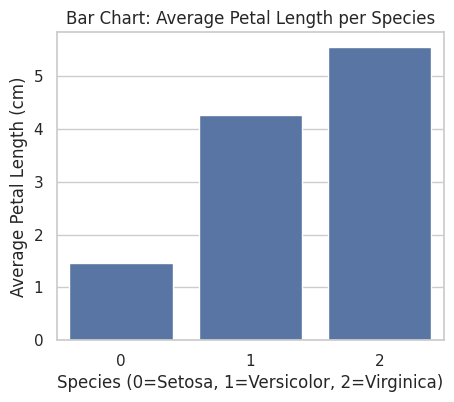

In [19]:
# 2. Bar chart: Average petal length per species
plt.figure(figsize=(5,4))
sns.barplot(x="target", y="petal length (cm)", data=df, ci=None)
plt.title("Bar Chart: Average Petal Length per Species")
plt.xlabel("Species (0=Setosa, 1=Versicolor, 2=Virginica)")
plt.ylabel("Average Petal Length (cm)")
plt.show()

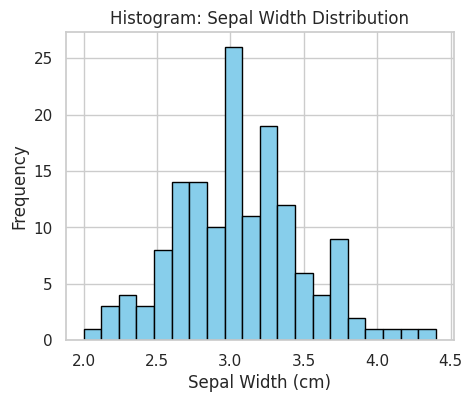

In [20]:
# 3. Histogram: Distribution of sepal width
plt.figure(figsize=(5,4))
plt.hist(df["sepal width (cm)"], bins=20, color="skyblue", edgecolor="black")
plt.title("Histogram: Sepal Width Distribution")
plt.xlabel("Sepal Width (cm)")
plt.ylabel("Frequency")
plt.show()

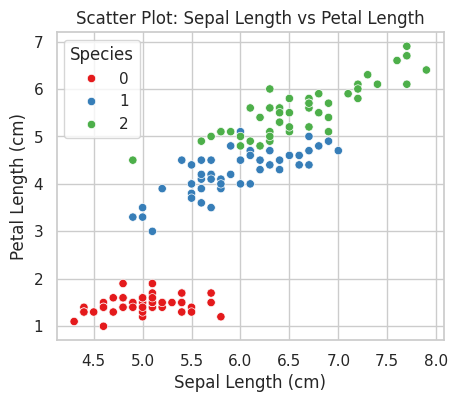

In [21]:
# 4. Scatter plot: Sepal length vs Petal length
plt.figure(figsize=(5,4))
sns.scatterplot(x="sepal length (cm)", y="petal length (cm)", hue="target", data=df, palette="Set1")
plt.title("Scatter Plot: Sepal Length vs Petal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.legend(title="Species")
plt.show()